#1. Properly load the data into Jupyter Notebooks

In [319]:
import matplotlib.pyplot as plt #matplotlib generates graphs.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC #i.e. Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("crx.data", header=None)
print(data.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')


Change the column names to correspond to the "real" labels from the second link.

In [320]:
data.rename(columns={1 : "age", 
                     2 : "debt",
                     3 : "married",
                     4 : "bankcustomer", 
                     5 : "educationlevel", 
                     6 : "ethnicity",
                     7 : "yearsemployed", 
                     8 : "priordefault",
                     9 : "employed",
                     10 : "creditscore",
                     11 : "driverslicense",
                     12 : "citizen",
                     13 : "zipcode",
                     14 : "income",
                     15 : "approved"}, inplace=True)
print(data.head())


   0    age   debt married bankcustomer educationlevel ethnicity  \
0  b  30.83  0.000       u            g              w         v   
1  a  58.67  4.460       u            g              q         h   
2  a  24.50  0.500       u            g              q         h   
3  b  27.83  1.540       u            g              w         v   
4  b  20.17  5.625       u            g              w         v   

   yearsemployed priordefault employed  creditscore driverslicense citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

  zipcode  income approved  
0   00202       0        +  
1   00043     560        +  
2   00280     824        +  
3   00

Remove all question marks from value 'age', and convert it to numerical.

In [321]:
data.loc[83,'age'] = ""
data.loc[86,'age'] = ""
data.loc[92,'age'] = ""
data.loc[97,'age'] = ""
data.loc[254,'age'] = ""
data.loc[286,'age'] = ""
data.loc[329,'age'] = ""
data.loc[445,'age'] = ""
data.loc[450,'age'] = ""
data.loc[500,'age'] = ""
data.loc[515,'age'] = ""
data.loc[608,'age'] = ""



data['age'] = pd.to_numeric(data['age'])

#2. Summarize the data.Frequency tables for categorical variables and histograms for continuous variables.

[[<AxesSubplot:title={'center':'debt'}>
  <AxesSubplot:title={'center':'age'}>]
 [<AxesSubplot:title={'center':'yearsemployed'}>
  <AxesSubplot:title={'center':'income'}>]
 [<AxesSubplot:title={'center':'creditscore'}> <AxesSubplot:>]]
              age        debt  yearsemployed  creditscore         income
count  678.000000  690.000000     690.000000    690.00000     690.000000
mean    31.568171    4.758725       2.223406      2.40000    1017.385507
std     11.957862    4.978163       3.346513      4.86294    5210.102598
min     13.750000    0.000000       0.000000      0.00000       0.000000
25%     22.602500    1.000000       0.165000      0.00000       0.000000
50%     28.460000    2.750000       1.000000      0.00000       5.000000
75%     38.230000    7.207500       2.625000      3.00000     395.500000
max     80.250000   28.000000      28.500000     67.00000  100000.000000
u    519
y    163
?      6
l      2
Name: married, dtype: int64
g     519
p     163
?       6
gg      2
Nam

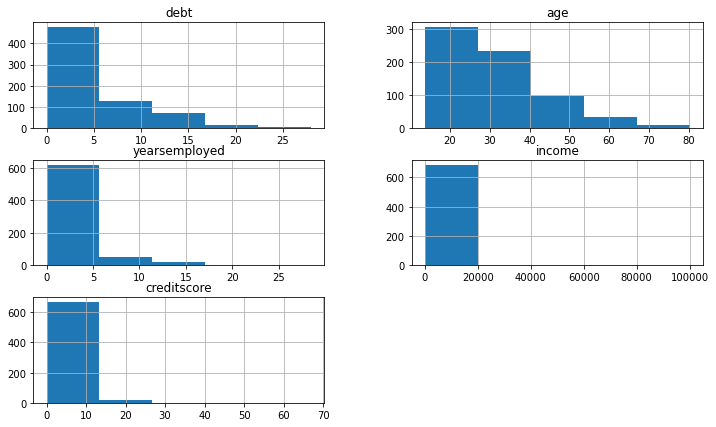

In [322]:
%matplotlib inline
z = data.hist(column=['debt', 'age', 'yearsemployed', 'income', 'creditscore'],bins=5, figsize=(12,7))
print(z) #is not adding them i.e. it creates a longer list.

summary_data = data.describe()
print(summary_data)

#Categorical variables:
#             "married", 
#             "bankcustomer", 
#             'educationlevel', 
#             'ethnicity',  
#             'priordefault', 
#             'employed', 
#             'driverslicense',
#             'citizen',
#             'approved'

married = data.loc[:,"married"].value_counts()
print(married)

bankcustomer = data.loc[:,"bankcustomer"].value_counts()
print(bankcustomer)

educationlevel = data.loc[:,"educationlevel"].value_counts()
print(educationlevel)

ethnicity = data.loc[:,"ethnicity"].value_counts()
print(ethnicity)

priordefault = data.loc[:,"priordefault"].value_counts()
print(priordefault)

employed = data.loc[:,"employed"].value_counts()
print(employed)

driverslicense = data.loc[:,"driverslicense"].value_counts()
print(driverslicense)

approved = data.loc[:,"approved"].value_counts()
print(approved)

citizen = data.loc[:,"citizen"].value_counts()
print(citizen)



#3. Split the sample into a test set and a train set with 20% of data being in the test dataset. Your random seed should be 808.

In [323]:
from sklearn.model_selection import train_test_split

data_features = data[['debt', "age", "married","bankcustomer", "educationlevel", "ethnicity", "yearsemployed", "priordefault","employed","creditscore",
"driverslicense","citizen","income"]]
data_target = data['approved']


x_train, x_test, y_train, y_test = train_test_split(data_features,
                                                    data_target,
                                                    test_size = 0.2,
                                                    random_state = 808)


#4. Try the following algorithms and choose the one that generates the best accuracy:

In [324]:
#First, we convert categorical variables to numerical.
data1 = pd.get_dummies(data).dropna()
print(data1)


print(list(data1.columns))

       age    debt  yearsemployed  creditscore  income  0_?  0_a  0_b  \
0    30.83   0.000           1.25            1       0    0    0    1   
1    58.67   4.460           3.04            6     560    0    1    0   
2    24.50   0.500           1.50            0     824    0    1    0   
3    27.83   1.540           3.75            5       3    0    0    1   
4    20.17   5.625           1.71            0       0    0    0    1   
..     ...     ...            ...          ...     ...  ...  ...  ...   
685  21.08  10.085           1.25            0       0    0    0    1   
686  22.67   0.750           2.00            2     394    0    1    0   
687  25.25  13.500           2.00            1       1    0    1    0   
688  17.92   0.205           0.04            0     750    0    0    1   
689  35.00   3.375           8.29            0       0    0    0    1   

     married_?  married_l  ...  zipcode_00720  zipcode_00760  zipcode_00840  \
0            0          0  ...              

As before, we split the sample into a test set and a train set with 20% of data being in the test dataset. Your random seed should be 808. This needs to be done after the "get_dummies()" command for decision tree to work.

In [325]:
from sklearn.model_selection import train_test_split

data_features = data1.loc[:,"age":"citizen_s"]
data_target = data1['approved_+']


x_train, x_test, y_train, y_test = train_test_split(data_features,
                                                    data_target,
                                                    test_size = 0.2,
                                                    random_state = 808)


print(x_train, x_test, y_train, y_test)


       age    debt  yearsemployed  creditscore  income  0_?  0_a  0_b  \
27   56.58  18.500         15.000           17       0    0    0    1   
100  37.50   1.750          0.250            0     400    0    0    1   
132  47.42   8.000          6.500            6   51100    0    1    0   
404  34.00   5.085          1.085            0       0    0    0    1   
401  28.92   0.375          0.290            0     140    0    0    1   
..     ...     ...            ...          ...     ...  ...  ...  ...   
480  16.92   0.500          0.165            6      35    0    1    0   
384  22.08  11.460          1.585            0    1212    0    0    1   
300  57.58   2.000          6.500            1      10    0    1    0   
249  21.83  11.000          0.290            6       0    0    0    1   
471  21.08   4.125          0.040            0     100    0    0    1   

     married_?  married_l  ...  ethnicity_z  priordefault_f  priordefault_t  \
27           0          0  ...            0 

In [337]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 689
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                678 non-null    float64
 1   debt               678 non-null    float64
 2   yearsemployed      678 non-null    float64
 3   creditscore        678 non-null    int64  
 4   income             678 non-null    int64  
 5   0_?                678 non-null    uint8  
 6   0_a                678 non-null    uint8  
 7   0_b                678 non-null    uint8  
 8   married_?          678 non-null    uint8  
 9   married_l          678 non-null    uint8  
 10  married_u          678 non-null    uint8  
 11  married_y          678 non-null    uint8  
 12  bankcustomer_?     678 non-null    uint8  
 13  bankcustomer_g     678 non-null    uint8  
 14  bankcustomer_gg    678 non-null    uint8  
 15  bankcustomer_p     678 non-null    uint8  
 16  educationlevel_?   678 non

In [326]:
data1.head()

,age,debt,yearsemployed,creditscore,income,0_?,0_a,0_b,married_?,married_l,...,zipcode_00720,zipcode_00760,zipcode_00840,zipcode_00928,zipcode_00980,zipcode_01160,zipcode_02000,zipcode_?,approved_+,approved_-
0,30.83,0.000,1.25,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,58.67,4.460,3.04,6,560,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,24.50,0.500,1.50,0,824,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27.83,1.540,3.75,5,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20.17,5.625,1.71,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


#a. Decision Trees

In [327]:
from sklearn.tree import DecisionTreeClassifier
init_model = DecisionTreeClassifier ()
fitted_model = init_model.fit(x_train ,y_train)
test_predictions = fitted_model.predict(x_test)
accuracy_score = fitted_model.score(x_test,y_test)
print(accuracy_score)


0.8382352941176471


#b. Logistic Regression 

In [328]:
#Logistic regression
model_lr = LogisticRegression()
fitted_model_lr = model_lr.fit(x_train, y_train)
test_predictions_lr = fitted_model_lr.predict(x_test)
accuracy_lr = fitted_model_lr.score(x_test,y_test)
print(fitted_model_lr.coef_)
print(accuracy_lr)

[[ 4.84069824e-03 -2.46678805e-02  1.20267584e-01  1.64279116e-01
   5.13339863e-04 -7.02796069e-03 -1.76746656e-01 -2.76489739e-02
   1.08863388e-01  3.10703871e-02 -8.26650419e-02 -2.68692324e-01
   1.08863388e-01 -8.26650419e-02  3.10703871e-02 -2.68692324e-01
   1.08863388e-01 -9.05194758e-02 -9.94068100e-02  1.87520056e-01
  -2.93554456e-02  3.49157435e-02 -3.61569082e-01 -2.52229191e-01
  -9.00501443e-04 -2.10370142e-01 -8.76721486e-02  1.76003560e-01
  -5.84801526e-03  1.76604192e-01  2.42540281e-01  1.08863388e-01
  -1.29883594e-01 -2.29978369e-02 -3.51268838e-01  1.80746065e-01
   5.79890564e-02  1.89933137e-02 -1.73749301e-08 -9.58931264e-02
   2.20279985e-02 -1.72796178e+00  1.51653819e+00 -3.04359173e-01
   9.29355818e-02 -1.62785055e-03 -2.09795740e-01 -2.90778257e-01
   9.97707085e-02 -2.04160423e-02]]
0.8602941176470589


/Users/loizoskon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#c. Bagging

In [336]:
#bagging, need to explore the concept and what each parameter does
from sklearn.ensemble import BaggingClassifier

#n_estimators is a number of randomly sampled datasets, similar to cv
model_bag = BaggingClassifier(
    base_estimator = tree.DecisionTreeClassifier(),
    n_estimators = 400,
    max_samples = 0.8,
    oob_score = True,
    random_state = 801
)
fitted_model_bag = model_bag.fit(x_train,y_train)
test_predictions_bag = fitted_model_bag.predict(x_test)
accuracy_bag = fitted_model_bag.score(x_test,y_test)
print(accuracy_bag)
print(model_bag.oob_score_)

0.8823529411764706
0.8579335793357934


#d. Boosting

In [330]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#e. Random Forest

#f. SVM

In [331]:
from sklearn.svm import SVC #i.e. Support Vector Classifier


#g. Passive Aggressive Classifier (Links to an external site.)

#h. Radius Neighbors Classifier (Links to an external site.)

In [332]:
#5. After completing Step 4, explain:
# Which algorithm you recommend
# What accuracy it has
# Why you measured accuracy the way you did

In [333]:
#6. Give a brief overview of the last two classifiers (Passive Agressive & Radius Neighbors). Try to make this description non-technical.